In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import sklearn
%matplotlib inline

In [64]:
print("Python Version:", sys.version)
print()
print("Pandas Version:", pd.__version__)
print()
print("Numpy Version:", np.__version__)
print()
print("Sklearn:", sklearn.__version__)

Python Version: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Pandas Version: 0.19.2

Numpy Version: 1.11.3

Sklearn: 0.18.1


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
movies = pd.read_csv('2013_movies.csv')
print(movies.columns)

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [67]:
y = movies.pop('DomesticTotalGross')
y.shape

(100,)

In [68]:
X = np.ones((100,1), dtype=np.int)

In [69]:
def make_model(X, y):
    X_scaled = preprocessing.scale(X)
    model = linear_model.LinearRegression()
    model.fit(X_scaled,y)
    predictions = model.predict(X_scaled)
    residuals = np.array(predictions - np.asarray(y))
    return predictions, residuals
predictions, residuals = make_model(X,y)

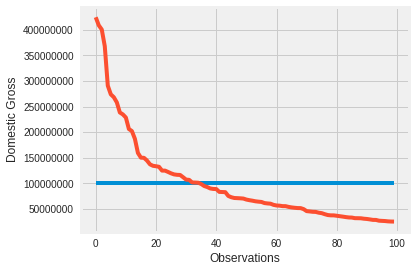

In [70]:
fig,ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.plot(predictions)
plt.plot(y)
plt.xlabel('Observations')
plt.ylabel('Domestic Gross')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show();

In [71]:
target_mean = y.mean()
print('Does our model predict the mean DTG? {}'.format(target_mean == predictions[0]))

Does our model predict the mean DTG? True


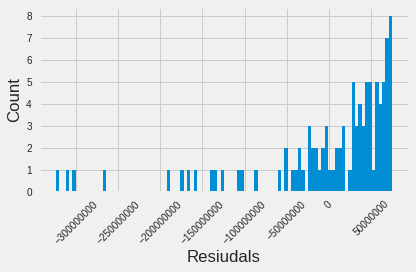

In [72]:
fig, ax = plt.subplots()
plt.hist(residuals, bins=100)
plt.xlabel('Resiudals')
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.locator_params(axis='x',nbins=10)
plt.tight_layout()
plt.show();

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [73]:
movies = pd.read_csv('2013_movies.csv')
print(movies.columns)

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')


In [74]:
X = pd.DataFrame(X, columns=['ones'])
X['budget'] = movies['Budget']

In [75]:
X['budget'].fillna(X['budget'].mean(), inplace=True)
X['budget'] = X['budget'].astype('int', copy=False)

In [76]:
predictions, residuals = make_model(X,y)

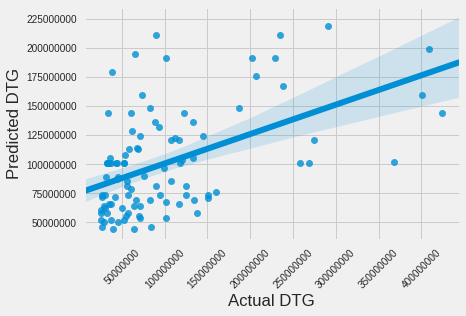

In [77]:
def make_reg(y, predictions):
    fig, ax = plt.subplots()
    sns.regplot(y, predictions);
    plt.xlabel('Actual DTG')
    plt.ylabel('Predicted DTG')
    plt.xticks(rotation=45)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show;
make_reg(y, predictions)

In [78]:
X.sort_values('budget', inplace=True)
y = y.reindex(X.index.values, copy=False)
#keep our targets matched with corresponding features

In [79]:
b_min = X['budget'].min()
b_max = X['budget'].max()
ticks = np.arange(b_min, b_max, (b_max-b_min) // 10)

In [81]:
predictions, residuals = make_model(X, y)

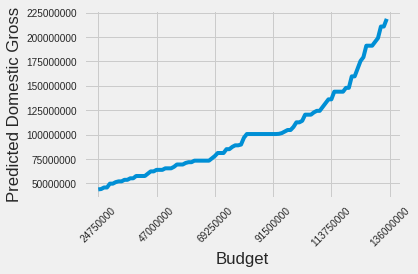

In [82]:
fig,ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.plot(predictions)
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Gross')
plt.xticks(rotation=45)
ax.set_xticklabels(ticks)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show();

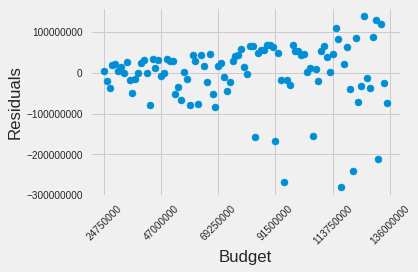

In [83]:
fig,ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.scatter(list(range(100)), residuals)
plt.xlabel('Budget')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
ax.set_xticklabels(ticks)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show();

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [84]:
movies = pd.read_csv('2013_movies.csv')
print(movies.columns)

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')


In [85]:
X = pd.get_dummies(movies['Rating'], drop_first=True)
y = movies.pop('DomesticTotalGross')

In [86]:
predictions, residuals = make_model(X, y)

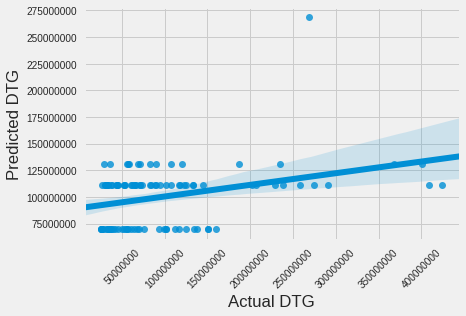

In [87]:
make_reg(y, predictions)

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [88]:
movies = pd.read_csv('2013_movies.csv')
print(movies.columns)

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')


In [89]:
X = pd.get_dummies(movies['Rating'], drop_first=True)
X['budget'] = movies['Budget']
y = movies.pop('DomesticTotalGross')

In [90]:
X['budget'].fillna(X['budget'].mean(), inplace=True)
X['budget'] = X['budget'].astype('int', copy=False)

In [91]:
predictions, residuals = make_model(X, y)

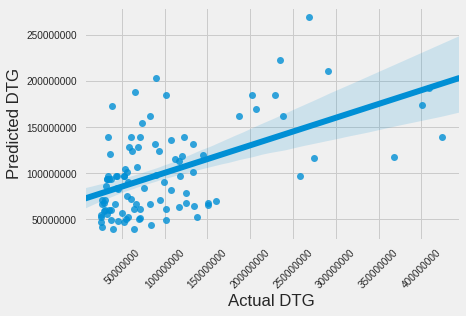

In [92]:
make_reg(y, predictions)

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [93]:
from sklearn.model_selection import train_test_split

X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [95]:
predictions, residuals = make_model(X, y)

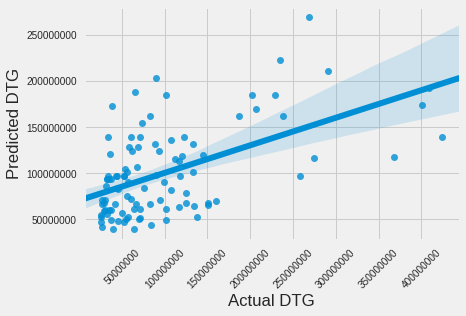

In [96]:
make_reg(y, predictions)